# CNN
이미지 분류할 때 쓰이던데... 
왜 쓰냐?, 어떻게 동작하나?

## Why?
이미지는 공간적 특성을 가지는데 Dense 층을 통과시켜서 학습하는 방법은 입력 데이터, 픽셀들을 다 1D로 펼쳐서 학습한다. 이로인해 이미지의 특성을 활용하지 못해 학습이 어렵다. CNN은 특정 크기의 커널로 이미지를 훑으면서 1차원이 아닌 공간적 특성이 포함된 데이터를 학습한다.

## How?
Convolution 이라는 말에서 알 수 있듯이 CNN은 이미지 위를 특정 크기의 커널이 이동하면서 그 위치에 해당하는 픽셀의 값을 곱하고 더해준다.
> Convolution(합성곱)은 하나의 함수와 또 다른 함수를 반전 이동한 값을 곱한 다음, 구간에 대해 적분하여 새로운 함수를 구하는 수학 연산자이다. (위키백과, 합성곱)

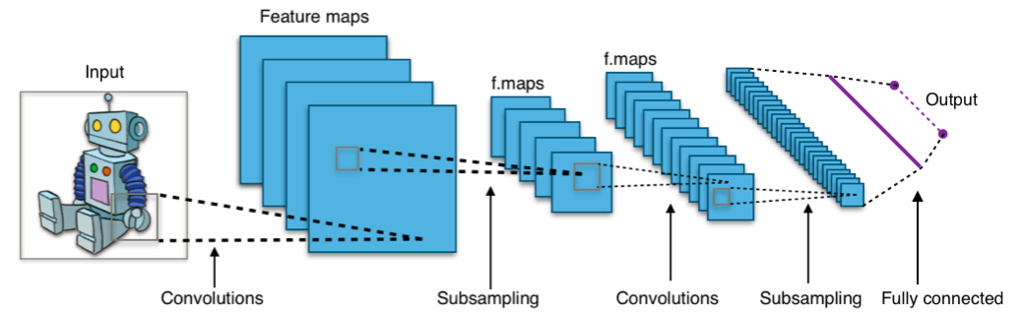

이미지를 분류하는 과정을 두 부분으로 나누면 첫 번째는 먼저 Conv 층을 통과하면서 특성을 추출한다. 두번째는 이를 펼쳐준 후 FC층을 통과해 어떤 클래스에 속할 확률이 높은지 구해 결과를 예측한다.  

[여기](https://cs231n.github.io/assets/conv-demo/index.html)에 자세한 CNN의 작동 방식이 나와있다.

위 링크처럼 커널이 이미지 위를 이동할 때 설정할 수 있는 파라미터들은
1. Kernel Size
2. Stride
3. Padding  

정도가 있다
```python
tensorflow.keras.layers.Conv2D(filter, kernel_size, strides, padding, ...)
```
- Kernel Size  
는 말 그대로 이미지를 훑을 커널의 크기로 얼마만큼의 부분을 볼 지 결정한다고 보면 된다. 커널 사이즈를  (5, 5)로 둔다면 한 번에 이미지의 5x5 픽셀 만큼 본다. 위 링크에서 필터는 (3, 3)의 커널 사이즈를 가진다.
- Stride  
는 필터가 몇 픽셀만큼 이동할 지 결정하는 파라미터다. 기본값은 (1, 1)로 옆으로 한 칸씩, 아래로 한 칸씩 이동한다. 위 링크에서는 (2, 2)이다. 케라스의 Conv2D 레이어에 정수형으로 값을 넘겨주면 알아서 위 아래로 같은 크기만큼 이동하게 들어간다.
- Padding  
은 입력한 이미지 주변에 0으로 비어있는 값을 추가해주는가에 대한 파라미터다. 'valid'로 할 경우 패딩을 하지 않으며, 'same'으로 할 경우 입력 이미지와 같은 크기로 출력이 나타나게 패딩을 추가해준다(strides=1 일 경우). 추가로 패딩을 추가하고 싶다면, 케라스 layers에 있는 ZeroPadding2D를 사용하면 된다. 패딩을 추가하는 이유는, 커널이 이미지 위를 이동할 때 모서리에 있는 값은 다른 보다 중앙에 있는 값들보다 적게 사용되는데, 이를 보완해주기 위함이다. 위 링크에서는 패딩을 추가해주었다.

In [11]:
import tensorflow as tf
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(28, 28, 3)))
model.add(tf.keras.layers.Conv2D(3, (3, 3), strides=3, padding='same'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 10, 10, 3)         84        
Total params: 84
Trainable params: 84
Non-trainable params: 0
_________________________________________________________________


In [13]:
import tensorflow as tf
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(28, 28, 3)))
model.add(tf.keras.layers.Conv2D(3, (3, 3), strides=1, padding='same'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 3)         84        
Total params: 84
Trainable params: 84
Non-trainable params: 0
_________________________________________________________________


padding='same'으로 주었을때 입력과 같은 크기로 출력하려면 strides=1, 기본값이어야한다. strides를 2 이상으로 둔다면 사이즈가 같지 않다. 출력 크기는
$$
N_{\text{out}} = \bigg[\frac{N_{\text{in}} + 2p - k}{s}\bigg] + 1
$$
로 계산할 수 있다.

Conv2D 레이어가 필터 수를 가장 첫 파라미터로 입력받는데, Dense 레이어의 출력 노드와 비슷하다고 생각하면 된다. 필터 하나하나는 이미지에서 어떤 패턴, 특징 하나에 맵핑된다. 그래서 필터 수가 많을 수록 여러 패턴을 학습 할 수 있고, 입력 부분에서는 보통 이미지가 RGB 세 값으로 표현되어 초기 채널의 수는 3이다(필터=커널, 커널의 수 만큼 채널이 만들어진다). 

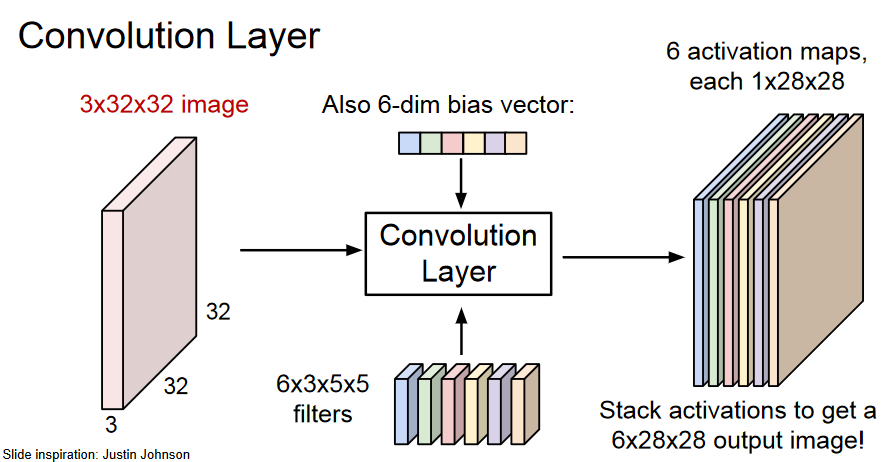  
Source [Stanford cs231n](http://cs231n.stanford.edu/index.html)


위 이미지는 채널이 3인 32x32 이미지가 입력으로 들어오고 출력의 채널이 6(필터 수가 6개), 커널 사이즈가 5x5인 경우이다. 스트라이드는 1, 패딩은 'valid'이다.


### Pooling
추가 학습 없이 이미지의 크기를 줄이고 싶을 때 Pooling을 사용한다.
보통 평균 풀링과 최대 풀링을 사용한다. 평균 풀링이 좋은거 아니야? 하겠지만 최대 풀링이 이미지의 특성을 잘 살려주기 때문에 최대 풀링이 좋은 경우가 있다. 채널 수는 변하지 않는다.

## Transfer Learning

자연어 처리에서 단어들의 임베딩 벡터를 가져와서 사용한다든지, BERT같은 사전 학습된 모델을 가져오는 것 처럼 이미지 처리 모델도 사전학습을 진행할 수 있다. 사용할 수 있는 모델은 다음과 같다.

In [19]:
print([model for model in dir(tf.keras.applications) if not model.startswith('_')])

['DenseNet121', 'DenseNet169', 'DenseNet201', 'EfficientNetB0', 'EfficientNetB1', 'EfficientNetB2', 'EfficientNetB3', 'EfficientNetB4', 'EfficientNetB5', 'EfficientNetB6', 'EfficientNetB7', 'InceptionResNetV2', 'InceptionV3', 'MobileNet', 'MobileNetV2', 'MobileNetV3Large', 'MobileNetV3Small', 'NASNetLarge', 'NASNetMobile', 'ResNet101', 'ResNet101V2', 'ResNet152', 'ResNet152V2', 'ResNet50', 'ResNet50V2', 'VGG16', 'VGG19', 'Xception', 'densenet', 'efficientnet', 'imagenet_utils', 'inception_resnet_v2', 'inception_v3', 'mobilenet', 'mobilenet_v2', 'mobilenet_v3', 'nasnet', 'resnet', 'resnet50', 'resnet_v2', 'vgg16', 'vgg19', 'xception']


이런 사전 학습된 모델을 불러올 때 출력단을 제외(include_top=False)하고 가져와서 원하는 출력을 내도록 레이어를 추가해 사용할 수 있다.

예시로 InceptionV3를 가져와보면 다음처럼 만들어 줄 수 있다.

In [22]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
tf.keras.backend.clear_session()

# imagenet으로 학습한 InceptionV3 모델을 출력단을 제외하고 가져온다 (Conv가 포함된 특성 추출 부분만)
base_model = InceptionV3(weights='imagenet', include_top=False)
# 가중치를 그대로 사용하기 위해 가중치를 동결시킨다.
base_model.trainable = False

model = tf.keras.models.Sequential()
# 입력 크기도 수정해 줄 수 있다.
model.add(tf.keras.Input(shape=(128, 128, 3)))
model.add(base_model)
# 출력단을 원하는 결과에 맞게 추가해주면 된다.
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, None, None, 2048)  21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 100)               102500    
Total params: 24,003,460
Trainable params: 2,200,676
Non-trainable params: 21,802,784
_________________________________________________________________


## Data Augmentation

[Tensorflow Tutorial, Data Augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation?hl=ko)